# 12. Gyakorlat - 2 DoF gerjesztett rendszer
2021.04.25.

## Feladat:

<center><img src="gyak12_1.png" width=300/></center>

A mellékelt ábrán egy 2 szabadságfokú mechanikai lengőrendszer látható, mely egy ingából és egy kocsiból áll. A kocsi egy kizárólag a vízszintes irányban elmozdulni képes merev testként van modellezve, melynek tömegét $m_1$ jelöli. Az inga, mely a B csukló körül képes csak elfordulni egy rúdként van modellezve: tömege $m_2$, hossza $l$. A rendszerre kétféle gerjesztő hatás hat: egy harmonikus erőgerjesztés $F(t) = F_0\sin(\omega t + \varepsilon)$ az inga C pontjában, valamint egy harmonikus útgerjesztés $r(t) = r_0\cos(\omega t)$ egy, a kocsihoz kapcsolódó $k$ rugómerevségű rugón keresztül. A rendszer mozgását az $x_1$ és $x_2$ általános koordináta választása mellett vizsgáljuk. Itt $x_1$ a kocsi súlypontjának vízszintes irányú elmozdulása, míg $x_2$ az inga C pontjának kitérése (az ábra szerint). A rendszer a függőleges síkban helyezkedik el, rá a $\mathbf{g}$ irányú gravitációs erő hat. Egyensúlyi helyzete az $x_1 = 0$, $x_2 = 0$ pozícióban található.
### Adatok:
|                              |                        |                        |
|:-----------------------------|:-----------------------|:-----------------------|
| $m_1$ = 2 kg                | $l$ = 0.5 m            | $\omega$ = 20 rad/s            |
| $m_2$ = 1 kg                | $F_0$ = 5 N           | $\varepsilon$ = $\pi$/3            |
| $k$ = 100 N/m                | $r_0$ = 0.01 m           |             |

### Részfeladatok:

1. Határozza meg a modell mátrix együtthatós mozgásegyenletét az egyensúlyi helyzet körüli kis kitéréseket feltételezve!
2. Adja meg a rendszer állandósult állapotbeli megoldását!
3. Számítsa ki a rúd maximális elfordulását az állandósult állapotbeli megoldás során!

## Megoldás:

### 1. Feladat

Mivel időfüggő kényszereink vannak (út- és erőgerjesztés), ezért közvetlenül nem tudjuk használni a mátrix együtthatós egyenlet meghatározása során használt összefüggéseinket. Itt a másodfajú Lagrange-egyenlethez kell fordulnunk.

In [1]:
# Először adjuk meg a kinetikus energiát
import sympy as sp
sp.init_printing()
from IPython.display import Math

t = sp.Symbol('t')
x1 = sp.Function('x_1')(t)
x2 = sp.Function('x_2')(t)
φ = sp.Function('φ')(t) # ő nem lesz ált. koord. (de lehetne)

q = sp.Matrix([[x1],[x2]]) # az ált. koord. vektora

m1, m2, l, k, F0, r0, ω, ε, g = sp.symbols('m_1, m_2, l, k, F_0, r_0, ω, ε, g')

r = r0*sp.cos(ω*t)
F = F0*sp.sin(ω*t+ε)

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben:
adatok = [(m1, 2), (m2, 1), (l, 0.5), (F0, 5), (ω, 20), 
          (ε, sp.pi/3), (k, 100), (r0, 0.01), (g, 9.81)]

A **kinetikus energia** alakja a következő: 
$$T=\underbrace{\frac{1}{2} m_{1} v_{\mathrm{B}}^{2}}_{T_{\text {kocsi }}}+\underbrace{\frac{1}{2} m_{2} v_{\mathrm{S}}^{2}+\frac{1}{2} \theta_{\mathrm{S}} \omega_{2}^{2}}_{T_{\text {inga }}},$$

ám nekünk ezt az általánosított koordinátákkal kell felírni!

In [2]:
# Az egyszerűen megállapítható, hogy `v_B = x1.diff(t)`.
# Szükséges még `v_S és ω_2`:

ω2 = sp.symbols('ω_2')

# kis kitérések esetén:
x2_phi_eq = sp.Eq(x2,l*φ)
x2_phi_eq

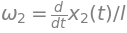

In [3]:
# Kifejezve φ-t, és deriválva mindkét oldalt:
φ_expr = sp.solve(x2_phi_eq,φ)[0]
ω2_expr = φ_expr.diff(t)
display(sp.Eq(φ,φ_expr))
display(sp.Eq(ω2,ω2_expr))  # most azzal ne foglalkozzunk, hogy `ω_2`-nél nincs jelölve az időfüggés

Sebességredukciós képet segítségével már számítható $\mathbf{v}_\mathrm{S}$ (ismerjük a rúd sebességállapotát):

$$\mathbf{v}_\mathrm{S} = \mathbf{v}_\mathrm{B} + \boldsymbol{\omega}_2 \times \mathbf{r}_\mathrm{BS}.$$



In [4]:
vB_vect = sp.Matrix([[sp.diff(x1,t)],[0],[0]])
ω2_vect = sp.Matrix([[0],[0],[ω2_expr]])
rBS_vect = sp.Matrix([[l/2*sp.sin(φ_expr)],[-l/2*sp.cos(φ_expr)],[0]])
vS_vect = vB_vect + ω2_vect.cross(rBS_vect)

In [5]:
# kifejezve az általános koordinátákkal
display(Math('\mathbf{{v}}_\mathrm{{S}} = {}'.format(sp.latex(vS_vect)))) 

<IPython.core.display.Math object>

In [6]:
# a kinetikus energiához még számoljuk ki a rúd tehetetlenségi nyomatékát:
ΘS = sp.Rational(1,12)*m2*l**2

# Tipp: figyeljünk arra, hogy a theták ne tévesszenek meg minket:
# `θ` -> `\theta + tab` (aka. kis theta)
# `Θ` -> `\Theta + tab` (aka. nagy theta)
# Ember legyen a talpán, aki debugolásnál meglátja a különbséget.

In [7]:
T = (sp.Rational(1,2)*m1*vB_vect.dot(vB_vect)
     + sp.Rational(1,2)*m2*vS_vect.dot(vS_vect) 
     + sp.Rational(1,2)*ΘS*ω2_vect.dot(ω2_vect))

In [8]:
""" Mint feljebb említettem, a mátrix együtthatós egyenletnél használatos
együttható mátrixok kiszámítási formuláit körültekintően kell használni,
ugyanis időfüggő gerjesztések hatnak a rendszerre. A tömegmátrix számításánál
azonban most ez megengedett, ugyanis a kinetikus energiában nincs explicit
időfüggő tag (pl. nincs kiegy. forgórész általi gerjesztés)."""

# Elsőnek parciálisan deriváljuk a kinetikus energiát a 2 ált. sebesség szerint,
# majd helyettesítsünk 0-t a helyükre.
# Szintax: egymásba ágyazott 2 db `list comprehension`. Olyan, mint 2 egymásba
# ágyazott `for` ciklus. 
M_array = [[T.expand().diff(q1.diff()).diff(q2.diff()).simplify().subs([(q1,0),(q2,0)]) for q1 in q] for q2 in q]
M = sp.Matrix(M_array)
display(Math('\mathbf{{M}} = {}'.format(sp.latex(M))))

<IPython.core.display.Math object>

In [9]:
## Potenciális energia

# Itt a Lagrange-egyenlet formuláit kell használnunk, mert van explicit időfüggés
U = -m2*g*l/2*sp.cos(φ_expr) + sp.Rational(1,2)*k*(x1-r)**2

U_d_q = sp.Matrix([U.diff(alt_koord).expand() for alt_koord in q]) # parc. derivált vektor
display(Math('\\begin{{bmatrix}}\\frac{{\\partial{{U}}}}{{\\partial{{x_1}}}} \\\\ \\frac{{\\partial{{U}}}}{{\\partial{{x_2}}}}  \\end{{bmatrix}}= {}'
             .format(sp.latex(U_d_q))))

# A hosszadalmas LaTeX kóddal ne foglalkozzunk most

<IPython.core.display.Math object>

In [10]:
""" Ami itt fontos nekünk, az a gerjesztést tartalmazó tag. Ez ugyanis
kiesne akkor, ha a márix együtthatós egyenlet formuláit használnánk.
"""
gerj = U_d_q[0].as_two_terms() 
# két részre szedjük az összeget
display(gerj) # így egy listában kapjuk vissza az összeg két tagját

In [11]:
# A gerjesztést tartalmazó második tag mínusz egyszerese 
# megy az általános Q erők vektorába
Qr = sp.Matrix([[-gerj[1]],[0]])
display(Math('\mathbf{{Q}}^r(t) = {}'.format(sp.latex(Qr))))

# Most, hogy 'elmentettük' a gerjesztő tagot, nyugodtan számolhatunk a kényelmes
# mátrix együthatós formulával (ahol kiesik ez a tag):

K_array = [[U.expand().diff(q1).diff(q2).simplify().subs([(q1,0),(q2,0)]) for q1 in q] for q2 in q]
K = sp.Matrix(K_array)

display(Math('\mathbf{{K}} = {}'.format(sp.latex(K))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
## Az általános erő vektora

""" Q egy részét már kiszámoltuk (Q_r). A másik tagot az erőgerjesztésből számíthatjuk (Q_F).
Írjuk fel ehhez a gerjesztő erő teljesítményét:"""

vC_y = sp.Symbol('vC_y') # igazából úgy is kiesik, de kell oda valami

vC_vect = sp.Matrix([[q[0].diff(t) + q[1].diff(t)],[vC_y]]) # `x1.diff(t)` mint szállító sebesség van jelen
P_F = sp.Matrix([[F],[0]]).dot(vC_vect)
display(Math('P_\mathrm{{F}} = {}'.format(sp.latex(P_F))))

<IPython.core.display.Math object>

In [13]:
# Ki kell fejezni a teljesítményt az általános sebességekkel is, és ez alapján
# lehet meghatározni az általános erők vektorát. Most egyszerű dolgunk van:
QF = sp.Matrix([P_F.expand().coeff(alt_coord.diff(t)) for alt_coord in q])
QF

Q = QF + sp.Matrix(Qr)
display(Math('\mathbf{{Q}}(t) = {}'.format(sp.latex(Q))))

<IPython.core.display.Math object>

Mivel az állandósult megoldásra vagyunk kíváncsiak, ezért az általános erő vektorát hozzuk az alábbi alakra:

$$\mathbf{Q}(t)=\mathbf{F}_{\mathrm{S}} \sin (\omega t)+\mathbf{F}_{\mathrm{C}} \cos (\omega t).$$

In [14]:
# az `applyfunc` függvénnyel tudunk egy mátrixnak minden elemére 
# alkalmazni egy adott függvényt (pl. `sp.simplify`).
Q_expand = Q.applyfunc(sp.expand_trig).expand()
display(Q_expand)

Fs = sp.Matrix([elem.coeff(sp.sin(ω*t)) for elem in Q_expand])
Fc = sp.Matrix([elem.coeff(sp.cos(ω*t)) for elem in Q_expand])
display(Math('\mathbf{{F}}_\mathrm{{S}} = {}'.format(sp.latex(Fs))))
display(Math('\mathbf{{F}}_\mathrm{{C}} = {}'.format(sp.latex(Fc))))

⎡F₀⋅sin(ε)⋅cos(t⋅ω) + F₀⋅sin(t⋅ω)⋅cos(ε) + k⋅r₀⋅cos(t⋅ω)⎤
⎢                                                       ⎥
⎣        F₀⋅sin(ε)⋅cos(t⋅ω) + F₀⋅sin(t⋅ω)⋅cos(ε)        ⎦

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
# Végül a mátrix együthatós mozgásegyenlet 
eom = sp.Eq(M*q.diff(t,2) + K*q, Fs*sp.cos(ω*t) + Fc*sp.sin(ω*t))
eom 

⎡               2                              ⎤                              
⎢              d                               ⎥                              
⎢          m₂⋅───(x₂(t))                       ⎥                              
⎢               2                      2       ⎥                              
⎢             dt                      d        ⎥                              
⎢k⋅x₁(t) + ───────────── + (m₁ + m₂)⋅───(x₁(t))⎥                              
⎢                2                     2       ⎥                              
⎢                                    dt        ⎥   ⎡F₀⋅cos(ε)⋅cos(t⋅ω) + (F₀⋅s
⎢                                              ⎥ = ⎢                          
⎢                    2               2         ⎥   ⎣    F₀⋅sin(ε)⋅sin(t⋅ω) + F
⎢                   d               d          ⎥                              
⎢               m₂⋅───(x₁(t))   m₂⋅───(x₂(t))  ⎥                              
⎢                    2               2         ⎥    

In [16]:
# Az olvashatóságot rontja, hogy a `sympy` automatikusan elvégzi az 
# összeadásokat és a szorzásokat. Ezt ki tudjuk küszöbölni, ha 
# `sp.MatAdd(tag_1, tag_2, ... )` és `sp.MatMul(tenyezo_1, tenyezo_2, ...)`
# függvényeket használunk.

sp.Eq(sp.MatAdd(sp.MatMul(M,q.diff(t,2)),sp.MatMul(K,q)), 
      sp.MatAdd(sp.MatMul(Fc,sp.cos(ω*t)),sp.MatMul(Fs,sp.sin(ω*t))))

              ⎡  2       ⎤                                                    
              ⎢ d        ⎥                                                    
⎡         m₂⎤ ⎢───(x₁(t))⎥                                                    
⎢m₁ + m₂  ──⎥ ⎢  2       ⎥   ⎡k   0  ⎤                                        
⎢         2 ⎥ ⎢dt        ⎥   ⎢       ⎥ ⎡x₁(t)⎤   ⎡F₀⋅sin(ε) + k⋅r₀⎤           
⎢           ⎥⋅⎢          ⎥ + ⎢   g⋅m₂⎥⋅⎢     ⎥ = ⎢                ⎥⋅cos(t⋅ω) +
⎢  m₂     m₂⎥ ⎢  2       ⎥   ⎢0  ────⎥ ⎣x₂(t)⎦   ⎣   F₀⋅sin(ε)    ⎦           
⎢  ──     ──⎥ ⎢ d        ⎥   ⎣   2⋅l ⎦                                        
⎣  2      3 ⎦ ⎢───(x₂(t))⎥                                                    
              ⎢  2       ⎥                                                    
              ⎣dt        ⎦                                                    

                     
                     
                     
                     
 ⎡F₀⋅cos(ε)⎤         
 ⎢         ⎥⋅sin(t⋅ω

### 2. Feladat

A partikuláris (állandósult) megoldást keressük

$$\mathbf{q}_{\mathrm{p}}=\mathbf{L} \cos (\omega t)+\mathbf{N} \sin (\omega t)$$

alakban.

In [17]:
L1, L2, N1, N2 = sp.symbols('L_1, L_2, N_1, N_2')
L = sp.Matrix([[L1],[L2]])
N = sp.Matrix([[N1],[N2]])

qp = L*sp.cos(ω*t) + N*sp.sin(ω*t)

In [18]:
# Ennek deriváltjait helyettesítsük be a mozgásegyenletbe
eom.lhs.subs([(x1,qp[0]),(x2,qp[1])])

⎡                                     2                                       
⎢                                    ∂                                        
⎢                                m₂⋅───(L₂⋅cos(t⋅ω) + N₂⋅sin(t⋅ω))            
⎢                                     2                                       
⎢                                   ∂t                                        
⎢k⋅(L₁⋅cos(t⋅ω) + N₁⋅sin(t⋅ω)) + ───────────────────────────────── + (m₁ + m₂)
⎢                                                2                            
⎢                                                                             
⎢                                                                             
⎢                                          2                                  
⎢                                         ∂                                   
⎢                                     m₂⋅───(L₁⋅cos(t⋅ω) + N₁⋅sin(t⋅ω))   m₂⋅─
⎢                                          2        

In [19]:
# Végeztessük el az idő szerinti deriváltakat (mint látható, még szimbolikus alakban vannak)
eom_stat = sp.Matrix([elem.doit().expand() for elem in eom.lhs.subs([(x1,qp[0]),(x2,qp[1])])])
eom_stat
# érdekes módon nem működik a `.applyfunc(sp.doit)` függvény, ezért 
# egy `list comprehension`-ben kellet elemenként alkalmazni

⎡                                                               2             
⎢                       2                   2            L₂⋅m₂⋅ω ⋅cos(t⋅ω)    
⎢L₁⋅k⋅cos(t⋅ω) - L₁⋅m₁⋅ω ⋅cos(t⋅ω) - L₁⋅m₂⋅ω ⋅cos(t⋅ω) - ───────────────── + N
⎢                                                                2            
⎢                                                                             
⎢                         2                                      2            
⎢                  L₁⋅m₂⋅ω ⋅cos(t⋅ω)   L₂⋅g⋅m₂⋅cos(t⋅ω)   L₂⋅m₂⋅ω ⋅cos(t⋅ω)   
⎢                - ───────────────── + ──────────────── - ───────────────── - 
⎣                          2                 2⋅l                  3           

                                                              2         ⎤
                      2                   2            N₂⋅m₂⋅ω ⋅sin(t⋅ω)⎥
₁⋅k⋅sin(t⋅ω) - N₁⋅m₁⋅ω ⋅sin(t⋅ω) - N₁⋅m₂⋅ω ⋅sin(t⋅ω) - ─────────────────⎥
                                                               2  

In [20]:
# Válogassuk ki `cos(ωt)` és `sin(ωt)` együtthatóit
coscoeff = sp.Matrix([elem.coeff(sp.cos(ω*t)) for elem in eom_stat])
sincoeff = sp.Matrix([elem.coeff(sp.sin(ω*t)) for elem in eom_stat])

# Tegyük őket be egy vektorba, majd azt tegyük egyenlővé az általános erő 
# kifejezésében lévő `cos(ωt)` és `sin(ωt)` együtthatóival. Helyettesítsük
# be a numerikus adatokat.

tmp = sp.Eq(sp.Matrix([coscoeff,sincoeff]).subs(adatok),sp.Matrix([[Fc],[Fs]]).subs(adatok))
tmp

                                  ⎡      5⋅√3⎤
                                  ⎢1.0 + ────⎥
⎡      -1100⋅L₁ - 200⋅L₂      ⎤   ⎢       2  ⎥
⎢                             ⎥   ⎢          ⎥
⎢-200⋅L₁ - 123.523333333333⋅L₂⎥   ⎢   5⋅√3   ⎥
⎢                             ⎥ = ⎢   ────   ⎥
⎢      -1100⋅N₁ - 200⋅N₂      ⎥   ⎢    2     ⎥
⎢                             ⎥   ⎢          ⎥
⎣-200⋅N₁ - 123.523333333333⋅N₂⎦   ⎢   5/2    ⎥
                                  ⎢          ⎥
                                  ⎣   5/2    ⎦

In [21]:
# Oldjuk meg az egyenletrendszert
megold = sp.solve(tmp,L1,L2,N1,N2)
megold # méterben

In [22]:
# Tehát a partikuláris megoldásunk:
eom_stat_num = sp.Eq(q,qp.subs(megold).subs(adatok).evalf(4))
eom_stat_num

⎡x₁(t)⎤   ⎡0.001994⋅sin(20⋅t) + 0.002166⋅cos(20⋅t)⎤
⎢     ⎥ = ⎢                                       ⎥
⎣x₂(t)⎦   ⎣-0.02347⋅sin(20⋅t) - 0.03856⋅cos(20⋅t) ⎦

### 3. Feladat

In [23]:
# Az állandósult állapotbeli megoldás `x_2`-re nézve:
x2_stat = eom_stat_num.rhs[1]
x2_stat
# ennek keressük a maximumát

# Ezt analitikusan sokkal egyszerűbb megoldani, mint deriválással
x2_max = sp.sqrt(megold[L2]**2+megold[N2]**2).evalf(4)
display(Math('x_{{2,\mathrm{{max}}}} = {}\\ \mathrm{{m}}'.format(sp.latex(x2_max))))

φ_max = φ_expr.subs(adatok).subs(x2,x2_max).evalf(4)
display(Math('\\varphi_{{\mathrm{{max}}}} = {}\\ \mathrm{{rad}}'.format(sp.latex(φ_max))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Készítette:

        Csuzdi Domonkos (Alkalmazott Mechanika Szakosztály)
        Molnár Csenge Andrea (BME MM) kidolgozása alapján.

        Hibák, javaslatok:
        amsz.bme@gmail.com
        csuzdi02@gmail.com

        2021.04.25